In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from google.colab import files
#uploaded = files.upload()

In [3]:
import io
#data = pd.read_csv(io.BytesIO(uploaded['spotify_preprocessed_-401226519 (1).csv']))
data = pd.read_csv('spotify_preprocessed_-401226519.csv')

In [4]:
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.738790,0.626533,0.090909,0.899432,0.0,0.070809,0.020080,0.000000,0.068476,0.723361,0.400098,0.093080,0.8,0.193225,0.093023,1.0
1,0.418807,0.247058,0.454545,0.687954,0.0,0.012962,0.874498,0.818090,0.080700,0.256148,0.676658,0.086266,0.6,0.155665,0.081395,0.0
2,0.530910,0.415269,0.818182,0.862211,0.0,0.031601,0.161647,0.000000,0.094582,0.280738,0.773251,0.103036,0.8,0.210605,0.081395,1.0
3,0.478668,0.648560,0.000000,0.880682,0.0,0.032351,0.005151,0.000000,0.194033,0.298156,0.305743,0.095749,0.8,0.138515,0.058140,0.0
4,0.810623,0.887860,0.090909,0.919516,1.0,0.270487,0.003825,0.000000,0.387755,0.799180,0.705958,0.067117,0.8,0.117248,0.069767,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,0.119504,0.358197,0.818182,0.692921,1.0,0.012533,0.889558,0.970854,0.307987,0.036988,0.191733,0.070997,0.8,0.114040,0.058140,0.0
6394,0.922725,0.366207,0.090909,0.789167,1.0,0.076701,0.100000,0.000000,0.253082,0.758197,0.469768,0.071668,0.8,0.152652,0.069767,1.0
6395,0.714845,0.804756,0.909091,0.904700,1.0,0.013926,0.013253,0.000003,0.126696,0.619877,0.469850,0.116119,0.8,0.097271,0.058140,1.0
6396,0.585329,0.176970,0.636364,0.657657,1.0,0.035994,0.992972,0.872362,0.137056,0.573770,0.470031,0.107686,0.8,0.101583,0.139535,0.0


In [5]:
data.shape

(6398, 16)

In [6]:
data.sample(frac=1).reset_index(drop=True) # shuffled the data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.366565,0.267083,0.454545,0.580979,0.0,0.022496,0.992972,0.928643,0.104941,0.184426,0.419887,0.039984,0.2,0.203125,0.034884,0.0
1,0.736613,0.696620,0.272727,0.892487,0.0,0.002357,0.046084,0.000097,0.093546,0.504098,0.335853,0.113662,0.8,0.122755,0.081395,1.0
2,0.332825,0.947935,0.636364,0.924418,1.0,0.091591,0.001084,0.000000,0.034497,0.395492,0.423535,0.101169,0.8,0.254615,0.058140,0.0
3,0.227253,0.436295,0.272727,0.853739,1.0,0.008141,0.802209,0.000155,0.082772,0.196721,0.238217,0.126305,0.6,0.132503,0.081395,0.0
4,0.539617,0.719649,1.000000,0.882725,1.0,0.020782,0.101406,0.000000,0.202321,0.494877,0.691471,0.125476,0.8,0.122738,0.093023,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,0.475403,0.947935,0.363636,0.811594,0.0,0.063739,0.004398,0.000000,0.307987,0.235656,0.337088,0.119264,0.8,0.115040,0.104651,0.0
6394,0.184806,0.650563,0.818182,0.793231,1.0,0.021746,0.000010,0.859296,0.128768,0.176230,0.440988,0.158505,0.8,0.350230,0.093023,0.0
6395,0.284937,0.372215,0.363636,0.720574,0.0,0.016283,0.106426,0.846231,0.064643,0.136270,0.487198,0.065667,0.8,0.312463,0.034884,0.0
6396,0.725729,0.732666,0.818182,0.893089,1.0,0.024317,0.013353,0.000000,0.303843,0.643443,0.516497,0.101584,0.8,0.207035,0.093023,1.0


In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size = 0.1,random_state=42)

In [8]:
train,val_data = train_test_split(train,test_size = 0.2,random_state=42)

In [9]:
train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
3932,0.703962,0.483354,0.000000,0.922913,1.0,0.005999,0.219880,0.000002,0.232363,0.854508,0.490636,0.119896,0.8,0.191685,0.127907,0.0
5102,0.843274,0.662578,0.090909,0.893455,1.0,0.027959,0.093976,0.000573,0.099762,0.695697,0.353626,0.108930,0.8,0.232561,0.093023,1.0
1070,0.429691,0.846808,0.363636,0.819421,1.0,0.026995,0.060040,0.000000,0.334922,0.871926,0.804065,0.109728,0.8,0.183404,0.093023,1.0
268,0.122769,0.979975,0.181818,0.902787,1.0,0.071987,0.000019,0.708543,0.209572,0.052152,0.470363,0.115955,0.6,0.277170,0.104651,0.0
5799,0.486286,0.637547,0.363636,0.899346,0.0,0.026352,0.071988,0.000011,0.064436,0.387295,0.772907,0.113913,0.6,0.119364,0.104651,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3986,0.601654,0.804756,0.000000,0.824259,1.0,0.480450,0.001747,0.000006,0.685072,0.453893,0.662125,0.092579,0.8,0.189354,0.104651,1.0
417,0.613626,0.520400,0.818182,0.829527,0.0,0.071452,0.175703,0.000000,0.117373,0.263320,0.222012,0.147529,0.8,0.215340,0.104651,1.0
335,0.683283,0.622528,0.454545,0.895153,0.0,0.042528,0.254016,0.000000,0.102870,0.557377,0.365199,0.105752,0.8,0.135298,0.104651,1.0
6210,0.638659,0.520400,0.818182,0.841655,0.0,0.030102,0.182731,0.000000,0.036983,0.339139,0.627034,0.122057,0.8,0.110094,0.081395,0.0


In [10]:
X_train = train.drop('target',axis=1)
y_train = train['target']

In [11]:
X_val = val_data.drop('target',axis=1)
y_val = val_data['target']

In [12]:
X_test = test.drop('target',axis=1)
y_test = test['target']

In [13]:
model_info=[]
train_loss_list=[]
train_acc=[]
val_loss_list=[]
val_acc=[]

Epoch 1/50
288/288 [==============================] - 2s 4ms/step - loss: 0.6705 - accuracy: 0.6105 - val_loss: 0.6437 - val_accuracy: 0.6858
Epoch 2/50
288/288 [==============================] - 1s 4ms/step - loss: 0.6199 - accuracy: 0.7152 - val_loss: 0.5965 - val_accuracy: 0.7318
Epoch 3/50
288/288 [==============================] - 1s 5ms/step - loss: 0.5714 - accuracy: 0.7475 - val_loss: 0.5511 - val_accuracy: 0.7517
Epoch 4/50
288/288 [==============================] - 1s 4ms/step - loss: 0.5334 - accuracy: 0.7529 - val_loss: 0.5204 - val_accuracy: 0.7552
Epoch 5/50
288/288 [==============================] - 1s 4ms/step - loss: 0.5104 - accuracy: 0.7579 - val_loss: 0.5022 - val_accuracy: 0.7561
Epoch 6/50
288/288 [==============================] - 1s 4ms/step - loss: 0.4949 - accuracy: 0.7655 - val_loss: 0.4888 - val_accuracy: 0.7604
Epoch 7/50
288/288 [==============================] - 1s 4ms/step - loss: 0.4852 - accuracy: 0.7681 - val_loss: 0.4812 - val_accuracy: 0.7674
Epoch 

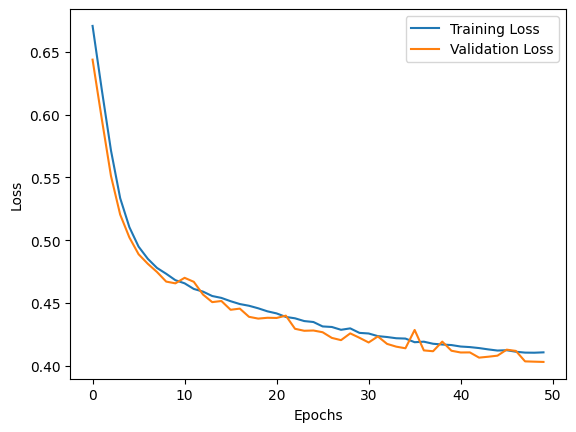

In [14]:
import tensorflow as tf
from tensorflow import keras

# Build the neural network 2 hidden layers that contain 32 nodes each and an output layer that has 1 unit using the Keras library.
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the network
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the network
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val))

# Plot the learning curve
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()




In [15]:
# Evaluate the model
info1='2 hidden layers that contain 32 nodes each and an output layer that has 1 unit using the Keras library'
train_loss, train_accuracy = model.evaluate(X_train, y_train)
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Training Loss: {train_loss:.2f}, Training Accuracy: {train_accuracy:.2f}")
print(f"Validation Loss: {val_loss:.2f}, Validation Accuracy: {val_accuracy:.2f}")

36/36 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8108
Training Loss: 0.40, Training Accuracy: 0.82
Validation Loss: 0.40, Validation Accuracy: 0.81


In [16]:
model_info.append(info1)
train_loss_list.append(train_loss)
train_acc.append(round(train_accuracy,2 ))
val_loss_list.append(val_loss)
val_acc.append(round(val_accuracy,2))

Epoch 1/50
288/288 [==============================] - 1s 3ms/step - loss: 0.6698 - accuracy: 0.6420 - val_loss: 0.6504 - val_accuracy: 0.7075
Epoch 2/50
288/288 [==============================] - 1s 2ms/step - loss: 0.6316 - accuracy: 0.7245 - val_loss: 0.6072 - val_accuracy: 0.7569
Epoch 3/50
288/288 [==============================] - 1s 3ms/step - loss: 0.5806 - accuracy: 0.7462 - val_loss: 0.5527 - val_accuracy: 0.7352
Epoch 4/50
288/288 [==============================] - 1s 3ms/step - loss: 0.5261 - accuracy: 0.7666 - val_loss: 0.5064 - val_accuracy: 0.7543
Epoch 5/50
288/288 [==============================] - 1s 3ms/step - loss: 0.4921 - accuracy: 0.7764 - val_loss: 0.4754 - val_accuracy: 0.7812
Epoch 6/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4736 - accuracy: 0.7783 - val_loss: 0.4598 - val_accuracy: 0.7934
Epoch 7/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4620 - accuracy: 0.7888 - val_loss: 0.4520 - val_accuracy: 0.7995
Epoch 

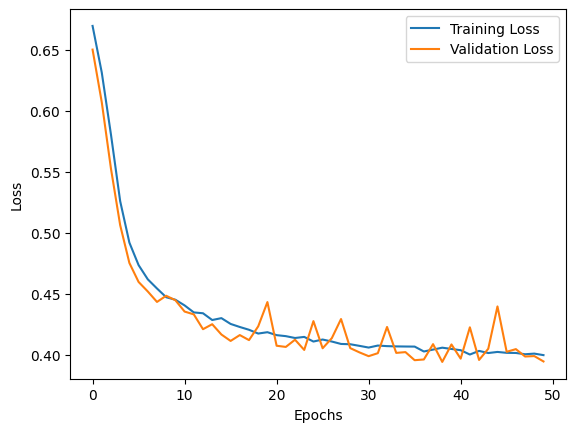

In [17]:
# adding different number of hidden layers considering
info2='3 layers, 64,32,32, binary_crossentropy, epochs=50,activation=sigmoid,optimize=SGD, batch_size=16'
model1 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the network
history = model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val))

# Plot the learning curve
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [18]:
# Evaluate the above model
train_loss, train_accuracy = model1.evaluate(X_train, y_train)
val_loss, val_accuracy = model1.evaluate(X_val, y_val)
print(f"Training Loss: {train_loss:.2f}, Training Accuracy: {train_accuracy:.2f}")
print(f"Validation Loss: {val_loss:.2f}, Validation Accuracy: {val_accuracy:.2f}")

36/36 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.8194
Training Loss: 0.39, Training Accuracy: 0.83
Validation Loss: 0.39, Validation Accuracy: 0.82


In [19]:
model_info.append(info2)
train_loss_list.append(train_loss)
train_acc.append(round(train_accuracy,2 ))
val_loss_list.append(val_loss)
val_acc.append(round(val_accuracy,2))

Epoch 1/50
288/288 [==============================] - 1s 3ms/step - loss: 0.2477 - accuracy: 0.5682 - val_loss: 0.2426 - val_accuracy: 0.6510
Epoch 2/50
288/288 [==============================] - 1s 2ms/step - loss: 0.2380 - accuracy: 0.6806 - val_loss: 0.2352 - val_accuracy: 0.6771
Epoch 3/50
288/288 [==============================] - 1s 2ms/step - loss: 0.2300 - accuracy: 0.6934 - val_loss: 0.2272 - val_accuracy: 0.6866
Epoch 4/50
288/288 [==============================] - 1s 2ms/step - loss: 0.2216 - accuracy: 0.7023 - val_loss: 0.2191 - val_accuracy: 0.6918
Epoch 5/50
288/288 [==============================] - 1s 2ms/step - loss: 0.2135 - accuracy: 0.7065 - val_loss: 0.2115 - val_accuracy: 0.6918
Epoch 6/50
288/288 [==============================] - 1s 3ms/step - loss: 0.2060 - accuracy: 0.7152 - val_loss: 0.2047 - val_accuracy: 0.6962
Epoch 7/50
288/288 [==============================] - 1s 3ms/step - loss: 0.1995 - accuracy: 0.7149 - val_loss: 0.1987 - val_accuracy: 0.7005
Epoch 

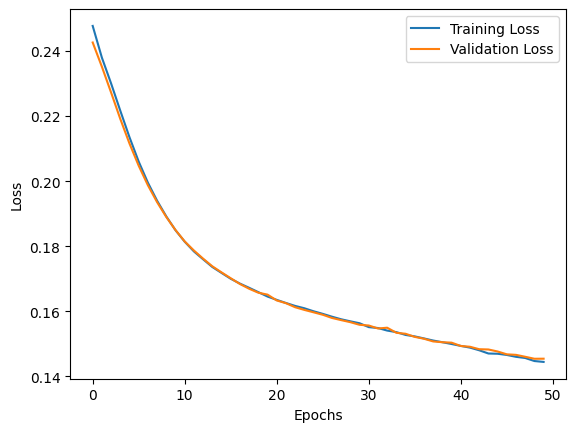

In [20]:
info3 = 'creating model with (2 layers, mean_squared_error, epochs=50,activation=sigmoid,optimize=SGD, batch_size=16)'
model2 = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# modifying loss funtion
model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mean_squared_error', metrics=['accuracy'])

# Train the network
history = model2.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val))

# Plot the learning curve
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()




In [21]:
# Evaluate the model
train_loss, train_accuracy = model2.evaluate(X_train, y_train)
val_loss, val_accuracy = model2.evaluate(X_val, y_val)
print(f"Training Loss: {train_loss:.2f}, Training Accuracy: {train_accuracy:.2f}")
print(f"Validation Loss: {val_loss:.2f}, Validation Accuracy: {val_accuracy:.2f}")

36/36 [==============================] - 0s 2ms/step - loss: 0.1454 - accuracy: 0.7821
Training Loss: 0.14, Training Accuracy: 0.80
Validation Loss: 0.15, Validation Accuracy: 0.78


In [22]:
model_info.append(info3)
train_loss_list.append(train_loss)
train_acc.append(round(train_accuracy,2 ))
val_loss_list.append(val_loss)
val_acc.append(round(val_accuracy,2))

Epoch 1/50
288/288 [==============================] - 2s 4ms/step - loss: 0.4910 - accuracy: 0.7592 - val_loss: 0.4503 - val_accuracy: 0.7734
Epoch 2/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4523 - accuracy: 0.7859 - val_loss: 0.4366 - val_accuracy: 0.7726
Epoch 3/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4490 - accuracy: 0.7864 - val_loss: 0.4574 - val_accuracy: 0.7717
Epoch 4/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4397 - accuracy: 0.7950 - val_loss: 0.4248 - val_accuracy: 0.8064
Epoch 5/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4272 - accuracy: 0.8007 - val_loss: 0.4268 - val_accuracy: 0.7934
Epoch 6/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4283 - accuracy: 0.8050 - val_loss: 0.4161 - val_accuracy: 0.8030
Epoch 7/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4215 - accuracy: 0.8081 - val_loss: 0.4112 - val_accuracy: 0.8064
Epoch 

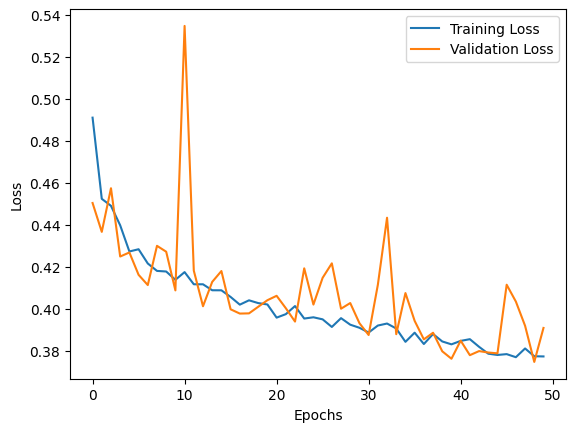

In [23]:
info4='creating  model with (2 layers, binary_crossentropy, epochs=50,activation=sigmoid,optimize=Adam, batch_size=16)'
model3 = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# modifying loss funtion
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the network
history = model3.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val))

# Plot the learning curve
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()




In [24]:
# Evaluate the model
train_loss, train_accuracy = model3.evaluate(X_train, y_train)
val_loss, val_accuracy = model3.evaluate(X_val, y_val)
print(f"Training Loss: {train_loss:.2f}, Training Accuracy: {train_accuracy:.2f}")
print(f"Validation Loss: {val_loss:.2f}, Validation Accuracy: {val_accuracy:.2f}")

36/36 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8160
Training Loss: 0.38, Training Accuracy: 0.83
Validation Loss: 0.39, Validation Accuracy: 0.82


In [25]:
model_info.append(info4)
train_loss_list.append(train_loss)
train_acc.append(round(train_accuracy,2 ))
val_loss_list.append(val_loss)
val_acc.append(round(val_accuracy,2))

Epoch 1/100
288/288 [==============================] - 2s 4ms/step - loss: 0.6831 - accuracy: 0.5901 - val_loss: 0.6661 - val_accuracy: 0.6615
Epoch 2/100
288/288 [==============================] - 1s 3ms/step - loss: 0.6494 - accuracy: 0.7036 - val_loss: 0.6354 - val_accuracy: 0.6970
Epoch 3/100
288/288 [==============================] - 1s 2ms/step - loss: 0.6141 - accuracy: 0.7162 - val_loss: 0.5974 - val_accuracy: 0.7292
Epoch 4/100
288/288 [==============================] - 1s 2ms/step - loss: 0.5753 - accuracy: 0.7282 - val_loss: 0.5595 - val_accuracy: 0.7188
Epoch 5/100
288/288 [==============================] - 1s 2ms/step - loss: 0.5419 - accuracy: 0.7421 - val_loss: 0.5292 - val_accuracy: 0.7431
Epoch 6/100
288/288 [==============================] - 1s 2ms/step - loss: 0.5173 - accuracy: 0.7540 - val_loss: 0.5077 - val_accuracy: 0.7682
Epoch 7/100
288/288 [==============================] - 1s 2ms/step - loss: 0.5005 - accuracy: 0.7642 - val_loss: 0.4919 - val_accuracy: 0.7717

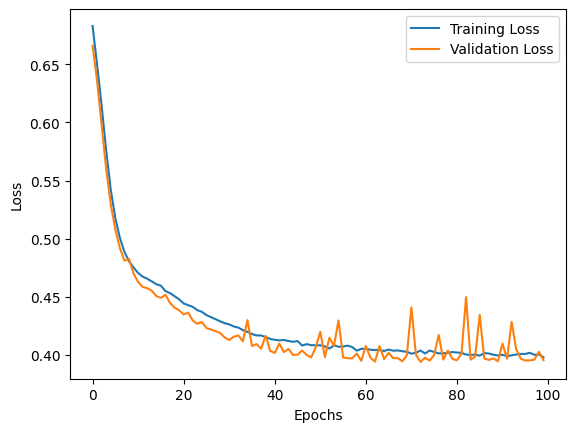

In [26]:
info5='creating model with (2 layers, binary_crossentropy, epochs=100,activation=sigmoid,optimize=SGD, batch_size=16)'
model4 = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# modifying loss funtion
model4.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the network
history = model4.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val))

# Plot the learning curve
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()




In [27]:
# Evaluate the model
train_loss, train_accuracy = model4.evaluate(X_train, y_train)
val_loss, val_accuracy = model4.evaluate(X_val, y_val)
print(f"Training Loss: {train_loss:.2f}, Training Accuracy: {train_accuracy:.2f}")
print(f"Validation Loss: {val_loss:.2f}, Validation Accuracy: {val_accuracy:.2f}")

36/36 [==============================] - 0s 1ms/step - loss: 0.3954 - accuracy: 0.8203
Training Loss: 0.39, Training Accuracy: 0.82
Validation Loss: 0.40, Validation Accuracy: 0.82


In [28]:
model_info.append(info5)
train_loss_list.append(train_loss)
train_acc.append(round(train_accuracy,2 ))
val_loss_list.append(val_loss)
val_acc.append(round(val_accuracy,2))

Epoch 1/50
144/144 [==============================] - 1s 3ms/step - loss: 0.6943 - accuracy: 0.5297 - val_loss: 0.6912 - val_accuracy: 0.5599
Epoch 2/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.6057 - val_loss: 0.6862 - val_accuracy: 0.6424
Epoch 3/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.6561 - val_loss: 0.6806 - val_accuracy: 0.6745
Epoch 4/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.6874 - val_loss: 0.6738 - val_accuracy: 0.6936
Epoch 5/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.7041 - val_loss: 0.6652 - val_accuracy: 0.6988
Epoch 6/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.7086 - val_loss: 0.6538 - val_accuracy: 0.7092
Epoch 7/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.7160 - val_loss: 0.6389 - val_accuracy: 0.7127
Epoch 

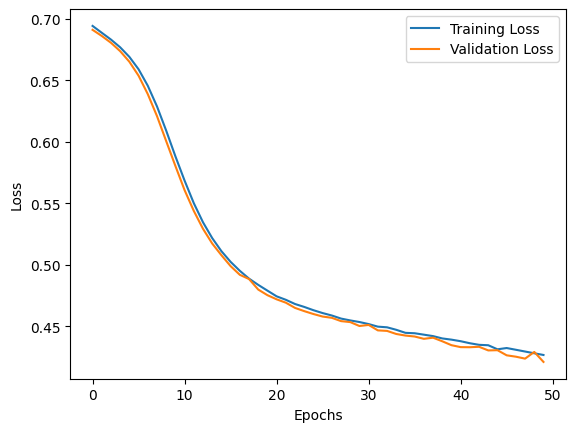

In [29]:
info6='creating model with (2 layers, binary_crossentropy, epochs=50,activation=sigmoid,optimize=SGD, batch_size=32)'
model5 = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# modifying loss funtion
model5.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the network
history = model5.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Plot the learning curve
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()




In [30]:
# Evaluate the model
train_loss, train_accuracy = model5.evaluate(X_train, y_train)
val_loss, val_accuracy = model5.evaluate(X_val, y_val)
print(f"Training Loss: {train_loss:.2f}, Training Accuracy: {train_accuracy:.2f}")
print(f"Validation Loss: {val_loss:.2f}, Validation Accuracy: {val_accuracy:.2f}")

36/36 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8090
Training Loss: 0.43, Training Accuracy: 0.81
Validation Loss: 0.42, Validation Accuracy: 0.81


In [31]:
model_info.append(info6)
train_loss_list.append(train_loss)
train_acc.append(round(train_accuracy,2 ))
val_loss_list.append(val_loss)
val_acc.append(round(val_accuracy,2))

Epoch 1/50
144/144 [==============================] - 1s 3ms/step - loss: 0.6946 - accuracy: 0.5011 - val_loss: 0.6902 - val_accuracy: 0.5009
Epoch 2/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5011 - val_loss: 0.6819 - val_accuracy: 0.5009
Epoch 3/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5011 - val_loss: 0.6728 - val_accuracy: 0.5009
Epoch 4/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.5011 - val_loss: 0.6613 - val_accuracy: 0.5009
Epoch 5/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.5011 - val_loss: 0.6469 - val_accuracy: 0.5009
Epoch 6/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.5011 - val_loss: 0.6295 - val_accuracy: 0.5009
Epoch 7/50
144/144 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.5011 - val_loss: 0.6093 - val_accuracy: 0.5009
Epoch 

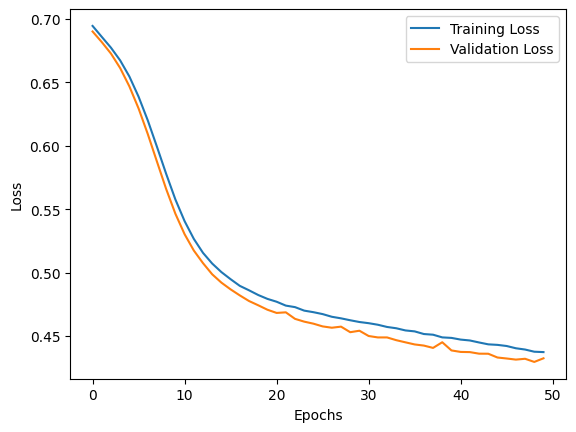

In [32]:
info7= 'creating model with (2 layers, binary_crossentropy, epochs=50,activation= softmax,optimize=SGD)'
model6 = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='softmax')
])

# modifying loss funtion
model6.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the network
history = model6.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Plot the learning curve
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()




In [33]:
# Evaluate the model
train_loss, train_accuracy = model6.evaluate(X_train, y_train)
val_loss, val_accuracy = model6.evaluate(X_val, y_val)
print(f"Training Loss: {train_loss:.2f}, Training Accuracy: {train_accuracy:.2f}")
print(f"Validation Loss: {val_loss:.2f}, Validation Accuracy: {val_accuracy:.2f}")

36/36 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.5009
Training Loss: 0.44, Training Accuracy: 0.50
Validation Loss: 0.43, Validation Accuracy: 0.50


In [34]:
model_info.append(info7)
train_loss_list.append(train_loss)
train_acc.append(round(train_accuracy,2 ))
val_loss_list.append(val_loss)
val_acc.append(round(val_accuracy,2))

Epoch 1/50
40/40 [==============================] - 1s 10ms/step - loss: 0.5835 - accuracy: 0.6750 - val_loss: 0.5515 - val_accuracy: 0.6406
Epoch 2/50
40/40 [==============================] - 0s 5ms/step - loss: 0.5105 - accuracy: 0.7141 - val_loss: 0.4803 - val_accuracy: 0.7604
Epoch 3/50
40/40 [==============================] - 0s 5ms/step - loss: 0.4645 - accuracy: 0.7750 - val_loss: 0.5181 - val_accuracy: 0.7370
Epoch 4/50
40/40 [==============================] - 0s 5ms/step - loss: 0.4744 - accuracy: 0.7719 - val_loss: 0.4662 - val_accuracy: 0.7569
Epoch 5/50
40/40 [==============================] - 0s 5ms/step - loss: 0.4561 - accuracy: 0.7688 - val_loss: 0.4823 - val_accuracy: 0.7561
Epoch 6/50
40/40 [==============================] - 0s 5ms/step - loss: 0.4347 - accuracy: 0.7812 - val_loss: 0.4461 - val_accuracy: 0.7830
Epoch 7/50
40/40 [==============================] - 0s 6ms/step - loss: 0.4344 - accuracy: 0.7891 - val_loss: 0.4565 - val_accuracy: 0.7760
Epoch 8/50
40/40 [=

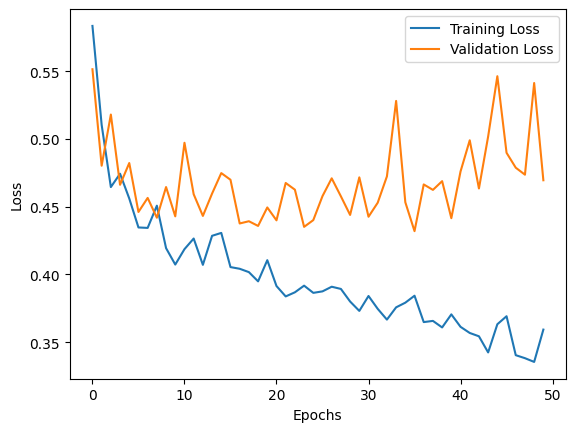

In [35]:
info8='considering the model with 2 layers, binary_crossentropy, epochs=100,activation=sigmoid,optimize=SGD, batch_size=16'
model4 = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_test.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# modifying loss funtion
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the network
history = model4.fit(X_test, y_test, epochs=50, batch_size=16, validation_data=(X_val, y_val))

# Plot the learning curve
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()




In [36]:
# Evaluate the model
train_loss, train_accuracy = model6.evaluate(X_train, y_train)
val_loss, val_accuracy = model6.evaluate(X_val, y_val)
print(f"Training Loss: {train_loss:.2f}, Training Accuracy: {train_accuracy:.2f}")
print(f"Validation Loss: {val_loss:.2f}, Validation Accuracy: {val_accuracy:.2f}")

36/36 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.5009
Training Loss: 0.44, Training Accuracy: 0.50
Validation Loss: 0.43, Validation Accuracy: 0.50


In [37]:
model_info.append(info8)
train_loss_list.append(train_loss)
train_acc.append(round(train_accuracy,2 ))
val_loss_list.append(val_loss)
val_acc.append(round(val_accuracy,2))

In [63]:
df = pd.DataFrame({'Serial Number':[1,2,3,4,5,6,7,8],'model':model_info,'Training_Loss':train_loss,'Training_Accuracy':train_acc,'Validation_Loss':val_loss,'Validation_Accuracy':val_acc})

In [66]:
df.set_index('Serial Number')

,model,Training_Loss,Training_Accuracy,Validation_Loss,Validation_Accuracy
Serial Number,,,,,
1,2 hidden layers that contain 32 nodes each and...,0.438928,0.82,0.43235,0.81
2,"3 layers, 64,32,32, binary_crossentropy, epoch...",0.438928,0.83,0.43235,0.82
3,"creating model with (2 layers, mean_squared_er...",0.438928,0.80,0.43235,0.78
4,"creating model with (2 layers, binary_crossen...",0.438928,0.83,0.43235,0.82
5,"creating model with (2 layers, binary_crossent...",0.438928,0.82,0.43235,0.82
6,"creating model with (2 layers, binary_crossent...",0.438928,0.81,0.43235,0.81
7,"creating model with (2 layers, binary_crossent...",0.438928,0.50,0.43235,0.50
8,"considering the model with 2 layers, binary_cr...",0.438928,0.50,0.43235,0.50


In [43]:
test_loss, test_accuracy = model4.evaluate(X_test, y_test)
print(f"Testing Loss: {test_loss:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

20/20 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.8281
Testing Loss: 0.3641
Testing Accuracy: 0.8281
